**Email Spam Classification Using Naive Bayes + Random Forest**



In [2]:
# for math operations
import pandas as pd
import numpy as np

# for progress bar
from tqdm import tqdm

# for data preprocessing
import re
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def cleanText(str):
  return ' '.join(re.sub('[^A-Za-z ]+', '', str.lower()).split()).replace('subject', '').strip()

In [4]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
mnb_model=MultinomialNB()
mnb_model.fit(X_train,y_train)

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [6]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

In [7]:
# Python code to find frequency of each word
def freqWord(word, str):
    return str.lower().split().count(word.lower())   

In [8]:
def GenFeature(str):
  a = list(df.columns)[1:3001]
  thisTest=[]
  for i in range(0, len(a)):
      thisTest.append(freqWord(a[i], str))
  return np.array(thisTest).reshape(1,3000)

NAIVE BAYES MODEL
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       712
           1       0.95      0.84      0.89       323

    accuracy                           0.94      1035
   macro avg       0.94      0.91      0.92      1035
weighted avg       0.94      0.94      0.94      1035



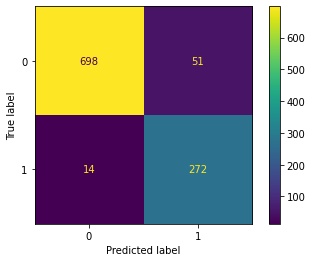

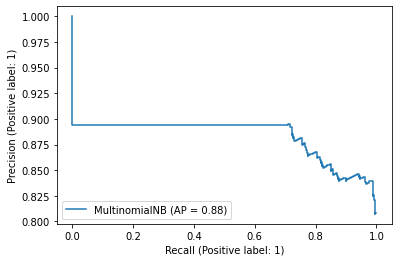

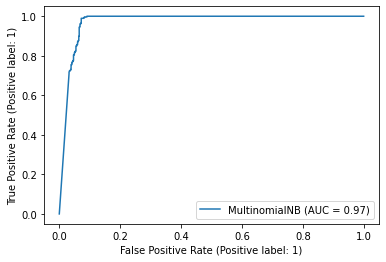

In [9]:
print("NAIVE BAYES MODEL")
report(mnb_model)

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       741
           1       0.95      0.92      0.93       294

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



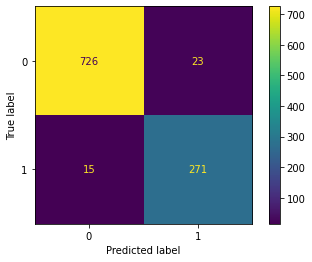

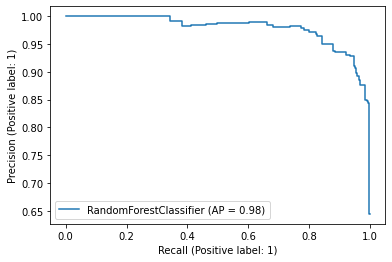

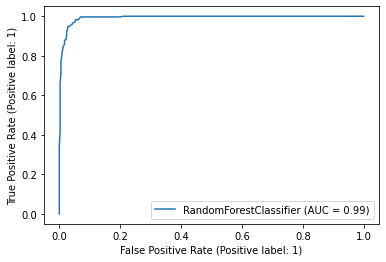

In [10]:
print("RANDOM FOREST MODEL")
report(rfc_model)

POS TAGGER USING CRF



In [11]:
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [12]:
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [13]:
from nltk.tag.util import untag

# Split the dataset for training and testing
cutoff = int(.75 * len(tagged_sentences))
training_sentences = tagged_sentences[:cutoff]
test_sentences = tagged_sentences[cutoff:]

def transform_to_dataset(tagged_sentences):
    X, y = [], []

    for tagged in tagged_sentences:
        X.append([features(untag(tagged), index) for index in range(len(tagged))])
        y.append([tag for _, tag in tagged])

    return X, y

X_train, y_train = transform_to_dataset(training_sentences)
X_test, y_test = transform_to_dataset(test_sentences)

In [14]:
#pip install sklearn-crfsuite


In [15]:
#pip install -U 'scikit-learn<0.24'

In [16]:
from sklearn_crfsuite import CRF

modelCRF = CRF(algorithm='lbfgs', c1=0.1,c2=0.1,max_iterations=100,all_possible_transitions=True)
save_model = modelCRF.fit(X_train, y_train)

with open('CRF.pickle', 'wb') as f:
  pickle.dump(save_model, f)

# Load model if exist

In [17]:
modelCRF = pickle.load(open('CRF.pickle', 'rb'))

In [18]:
import pandas as pd
train = pd.read_csv('../datasets/BBC-News-Train.csv')
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [19]:
import nltk
from nltk.corpus import reuters,brown
nltk.download('reuters')
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk import word_tokenize
from nltk.tag import untag
from nltk import UnigramTagger

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [20]:
from collections import defaultdict

def get_POS():
  DF = pd.DataFrame(columns=['Text', 'Category'])
  for i in range(len(train)):
    sentence = word_tokenize(train['Text'][i])
    category = train['Category'][i]
    sentence_features = [features(sentence, index) for index in range(len(sentence))]
    res=[]
    pos_tag = modelCRF.predict([sentence_features])
    for k in range(len(sentence)):
      tag = pos_tag[0][k]
      if tag == 'NN':
        res.append(sentence[k])
    str = ' '.join(set(res))
    DF.loc[i] =[str, category]
  return DF

In [21]:
trainEmail = get_POS()

trainEmail.to_pickle('EmailDataFrame.pickle')

# Load Email dataframe if exist

In [22]:
trainEmail = pd.read_pickle('EmailDataFrame.pickle')

In [23]:
def pos_tag(sentence):
    sentence_features = [features(sentence, index) for index in range(len(sentence))]
    return list(zip(sentence, modelCRF.predict([sentence_features])[0]))

In [24]:
print(pos_tag(word_tokenize("a")))

[('a', 'DT')]


EMAIL CLASSIFICATION

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
trainCate = trainEmail[['Text','Category']]
trainCate.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [27]:
stemmer = PorterStemmer()
words = stopwords.words("english")

trainCate['Text'] = trainCate['Text'].apply(
    lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [28]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(trainCate['Text']).toarray()
final_features.shape

(1490, 7678)

In [29]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = trainCate['Text']
Y = trainCate['Category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)

In [30]:
ytest = np.array(y_test)
  
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.90      0.97      0.93        64
entertainment       0.95      0.95      0.95        58
     politics       0.96      0.90      0.93        50
        sport       0.96      0.99      0.97        73
         tech       0.96      0.89      0.92        53

     accuracy                           0.94       298
    macro avg       0.94      0.94      0.94       298
 weighted avg       0.94      0.94      0.94       298

[[62  0  0  1  1]
 [ 0 55  2  0  1]
 [ 5  0 45  0  0]
 [ 0  1  0 72  0]
 [ 2  2  0  2 47]]


In [31]:
# ynew = model.predict([str(trainCate[0]['Text'])])
message1 = [str(trainCate['Text'][0])]
pred = model.predict(message1)
print(pred)

['business']


In [39]:
def Main(message):
  isSpamRF = rfc_model.predict(GenFeature(message))
  isSpamNB = mnb_model.predict(GenFeature(message))
  print("RANDOM FOREST MODEL PREDICTED SPAM MAIL" if isSpamRF == 1 else "RANDOM FOREST MODEL PREDICTED HAM MAIL")
  print("NAIVE BAYES MODEL PREDICTED SPAM MAIL" if isSpamNB == 1 else "NAIVE BAYES MODEL PREDICTED HAM MAIL")
  predDomain = model.predict([str(message)])
  print("EMAIL TYPE: " + predDomain[0])
  # print("POS TAGGER:")
  # print(pos_tag(word_tokenize(message)))

In [41]:
print('EMAIL TEXT')
x = input()
Main(x)

EMAIL TEXT
RANDOM FOREST MODEL PREDICTED SPAM MAIL
NAIVE BAYES MODEL PREDICTED HAM MAIL
EMAIL TYPE: sport
